# Izbor seta podataka

In [ ]:
!git clone https://github.com/nkaralic2/attrition_rate.git

Cloning into 'attrition_rate'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 99.72 KiB | 2.27 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statistics
import plotly.express as px
from mpl_toolkits import mplot3d
from prettytable import PrettyTable
from google.colab import drive
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as smprop
from scipy.stats import chi2
import math
from scipy import stats
import scipy.stats as st
from statsmodels.stats.proportion import proportion_confint
import statsmodels.stats.proportion as proportion
import pandas_datareader as pdr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
sb.set()
import datetime as dt



tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

In [ ]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
tabela.head(1000)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,33,No,Non-Travel,Research & Development,2,4,Medical,1,Male,...,13.0,4,11,1,7,4.0,2.0,2.0,3,3
996,997,49,No,Travel_Rarely,Sales,3,4,Marketing,1,Male,...,8.0,4,5,0,4,4.0,4.0,4.0,3,3
997,998,33,Yes,Travel_Rarely,Research & Development,10,3,Life Sciences,1,Male,...,11.0,3,0,0,0,1.0,1.0,2.0,1,3
998,999,38,No,Travel_Frequently,Research & Development,28,3,Medical,1,Male,...,9.0,3,6,0,5,3.0,2.0,2.0,3,3


**Deklarisanje varijabli:**

In [ ]:
poslovna_putovanja = tabela['BusinessTravel']
odjel = tabela['Department']
starost = tabela['Age']
napustanje = tabela['Attrition']
udaljenost_od_kuce = tabela['DistanceFromHome']
nivo_obrazovanja = tabela['Education']
obrazovanje = tabela['EducationField']
spol = tabela['Gender']
godine_rada = tabela['TotalWorkingYears']
obuka = tabela ['TrainingTimesLastYear']
iskustvo = tabela['YearsAtCompany']
zadnje_unaprjedjenje = tabela['YearsSinceLastPromotion']
trenutni_sef = tabela ['YearsWithCurrManager']
okolina = tabela['EnvironmentSatisfaction']
posao = tabela['JobSatisfaction']
balans = tabela['WorkLifeBalance']
ukljucenost = tabela['JobInvolvement']
performanse = tabela['PerformanceRating']
bracni_status= tabela['MaritalStatus']
uloga_u_poslu = tabela['JobRole']



# Analiza seta podataka

-Mahir

***Ovaj put, naša tema je napuštanje radnika u kompanijama. Zašto dolazi do napuštanja, da li su radnici nezadovoljni i da li je moguće ispraviti eventualne greške prikazat ćemo kroz deskriptivnu statistiku i vizulizacije, ali prije toga par osnovnih informacija i povezanosti:***

TEZA 1: RAD U KOMPANIJAMA JE MONOTON

```

```


TEZA 2: KOMPANIJE NAPUŠTAJU STARIJI RADNICI KOJI NE VIDE LIČNI NAPREDAK

1. ***Da li je struktura zaposlenih raznovrsna po pitanju godina iskustva, nivoa obrazovanja i zainteresovanosti za nova usavršavanja?***

<ipython-input-7-4989653b97e2>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




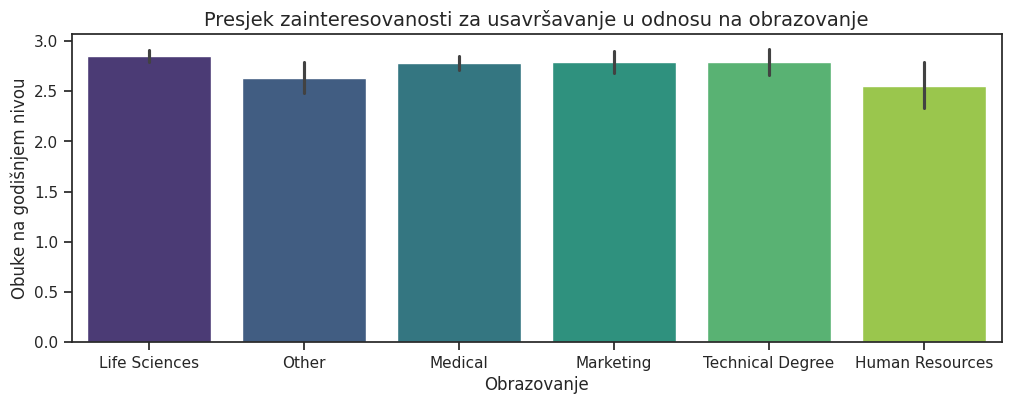

In [ ]:
fig=px.histogram(tabela,x=godine_rada, marginal = 'box')
fig.show()

print("\n")

fig=px.box(tabela,x=spol,y=iskustvo,color=odjel,title='Zastupljenost spolova u različitim odjelima i sa različitim iskustvom')
fig.show()

print("\n")

sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=obrazovanje, y=obuka, palette='viridis')

ax.set_xlabel('Obrazovanje', fontsize=12)
ax.set_ylabel('Obuke na godišnjem nivou', fontsize=12)
ax.set_title('Presjek zainteresovanosti za usavršavanje u odnosu na obrazovanje', fontsize=14)

plt.show()


Prethodni prikazi u vidu histograma, box plota i bar plota nam pokazuju da je uzorak prilično vjerodostojan, jer imamo zastupljenost kadrova sa različitim iskustvom u kompanijama, na različitim poslovima, postoje razlike u primarnim zanimanjima i odanosti kompaniji muške i ženske populacije, što je donekle i za očekivati. Većina edukovanih kadrova također ima želju za usavršavanjem na godišnjem nivou, i vidimo da na posljednjem prikazu bar plotom uočavamo da svi imaju poprilično iste mogućnosti da učestvuju u obukama.


Ostalo nam je kratka diskusija o uslovima koju ćemo završiti sa scatter plotom i još jednim zanimljivim vizuelnim prikazom, a prije toga ćemo izračunati modu, medijanu i aritmetičku sredinu koja će nam omogućiti da vidimo kakvi su radni uslovi u kompanijama.

***2. Kakvi su radni uslovi i starosna dob radnika?***


In [ ]:
#Analiza rezultata starosti uposlenih:
age_mean=statistics.mean(starost)
age_moda=statistics.mode(starost)
age_mediana=statistics.median(starost)
age_varijansa=statistics.variance(starost)

#Analiza rezultata udaljenosti od kompanije
dist_mean=statistics.mean(udaljenost_od_kuce)
dist_moda=statistics.mode(udaljenost_od_kuce)
dist_mediana=statistics.median(udaljenost_od_kuce)
dist_varijansa=statistics.variance(udaljenost_od_kuce)

#Analiza rezultata posljednjeg unaprijedjenja:
prom_mean=statistics.mean(zadnje_unaprjedjenje)
prom_moda=statistics.mode(zadnje_unaprjedjenje)
prom_mediana=statistics.median(zadnje_unaprjedjenje)
prom_varijansa=statistics.variance(zadnje_unaprjedjenje)

tabela = PrettyTable(["Kategorija", "Prosjek za kategorije", "Medijana uzorka", "Moda uzorka", "Varijansa"])
tabela.add_row(["Starosna dob", age_mean, age_mediana, age_moda, round(age_varijansa,2)])
tabela.add_row(["Udaljenost od kompanije", dist_mean, dist_mediana, dist_moda, round(dist_varijansa,2)])
tabela.add_row(["Posljednje unaprjeđenje", prom_mean, prom_mediana, prom_moda, round(prom_varijansa,2)])
print(tabela)

+-------------------------+-----------------------+-----------------+-------------+-----------+
|        Kategorija       | Prosjek za kategorije | Medijana uzorka | Moda uzorka | Varijansa |
+-------------------------+-----------------------+-----------------+-------------+-----------+
|       Starosna dob      |   36.923809523809524  |       36.0      |      35     |   83.42   |
| Udaljenost od kompanije |    9.19251700680272   |       7.0       |      2      |   65.69   |
| Posljednje unaprjeđenje |   2.1877551020408164  |       1.0       |      0      |   10.38   |
+-------------------------+-----------------------+-----------------+-------------+-----------+


Možemo vidjeti da su prosjek, medijana i moda za starosnu dob prilično ujednačeni, što znači da kompanije napuštaju ljudi u godinama u kojima su, može se reći, najsposobniji i najproduktivniji. Udaljenost od kompanije očito ne bi trebala predstavljati problem, jer vidimo da je moda uzorka prilično niska, a znamo da prosjek i nije baš najvjerodostojnija informacija. Godine od posljednjeg unaprjeđenja su u prosjeku nešto lošije, ali su ipak medijana i moda prilično stabilni i korektni. Razlog za napuštanje radnika ne možemo pronaći ni u ove tri kategorije.

3. ***Koliko je populacija s različitim obrazovanjem zadovoljna poslom i okolinom?***

In [ ]:
fig=px.box(tabela,x=spol,y=posao,color=obrazovanje,title='Zadovoljstvo u poslu u odnosu na nivo obrazovanja i spol')
fig.show()

print('\n')

fig=px.box(tabela,x=spol,y=okolina,color=obrazovanje,title='Zadovoljstvo u radnom okruženju u odnosu na nivo obrazovanja i spol')
fig.show()





Ovdje vidimo da zadovoljstvo poslom i okolinom varira, odnosno da postoje oni koji su nezadovoljni radnom atmosferom i to je uglavnom muška populacija koja je završila neke od društveno usmjerenih fakulteta, odnosno konkretno ljudski resursi i marketing. Kompanije uglavnom previše zahtjevaju u toj oblasti. Jedan od mogućih razloga napuštanja je otkriven.

4. ***Koliko putuju različite starosne skupine, odnosno koliko imaju priliku učiniti manje monotonim radni dan?***

In [ ]:
fig=px.box(tabela,x=poslovna_putovanja,y=starost,color=odjel,title='Različite starosne skupine u odnosu na putovanja i odjel u kome rade')
fig.show()

Na ovom grafiku vidimo da se za ljudske resurse traže neke dobne granice, vjerovatno vezano za iskustvo, ali također vidimo da mnogo radnika u godinama u kojima smo zaključili da najviše napuštaju uopšte ne putuju poslovno, te da im je vjerovatno rad u firmi jako monoton. Najveću priliku za putovanja imaju radnici u oblasti istraživanja i unaprjeđenja poslovanja, što je donekle razumljivo.

Sada možemo sa par vjerovatnoća da potvrdimo prethodne teze, odnosno sve ono što smo pretpostavili kroz vizualizacije, odnosno plotove.

***5. Da li su TEZA 1 i TEZA 2 tačne?***

In [ ]:
brojnik1 = tabela[(starost>30 ) & (tabela['Attrition']=='Yes')].shape[0]
nazivnik1 = tabela[tabela['Attrition']=='Yes'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da je osoba starosti preko 30 godina napustila kompaniju je: ",vjerovatnoca_zavrsenog_kursa)

print('\n')

brojnik1 = tabela[(godine_rada>15) & (tabela['BusinessTravel']=='Travel_Rarely')].shape[0]
nazivnik1 = tabela[tabela['BusinessTravel']=='Travel_Rarely'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da osoba koja radi više od 15 godina u firmi ima poslovna putovanja: ",vjerovatnoca_zavrsenog_kursa)

print('\n')

brojnik1 = tabela[(posao>3) & (tabela['Department']=='Human Resources')].shape[0]
nazivnik1 = tabela[tabela['Department']=='Human Resources'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da je radnik na poziciji Human Resources jako zadovoljan svojim poslom: ",vjerovatnoca_zavrsenog_kursa)

print('\n')

brojnik1 = tabela[(okolina>3) & (tabela['EducationField']=='Technical Degree')].shape[0]
nazivnik1 = tabela[tabela['EducationField']=='Technical Degree'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da je radnik koji ima diplomu tehničkog fakulteta jako zadovoljan svojim radnim okruženjem: ",vjerovatnoca_zavrsenog_kursa)

print('\n')

brojnik1 = tabela[(udaljenost_od_kuce>5) & (tabela['Attrition']=='Yes')].shape[0]
nazivnik1 = tabela[tabela['Attrition']=='Yes'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da radnik koji je dalje od 5 kilometara napusti kompaniju: ",vjerovatnoca_zavrsenog_kursa)

print('\n')


Vjerovatnoća da je osoba starosti preko 30 godina napustila kompaniju je:  0.5780590717299579


Vjerovatnoća da osoba koja radi više od 15 godina u firmi ima poslovna putovanja:  0.24480664749121125


Vjerovatnoća da je radnik na poziciji Human Resources jako zadovoljan svojim poslom:  0.3333333333333333


Vjerovatnoća da je radnik koji ima diplomu tehničkog fakulteta jako zadovoljan svojim radnim okruženjem:  0.2702020202020202


Vjerovatnoća da radnik koji je dalje od 5 kilometara napusti kompaniju:  0.5738396624472574




Izdvojili smo ovih par vjerovatnoća, jer bi nam oni mogli potvrditi prethodne vizualizacije i pretpostavke. Prve dvije vjerovatnoće smo povezali da kažemo da li je zaista monotona radna atmosfera za radnike koji su duže vrijeme u kompaniji, odnosno da li oni imaju malo poslovnih putovanja. To smo potvrdili i vidimo da kompaniju napušta veliki broj starijih radnika koji ne putuju. Dalje u prethodnim primjerima smo željeli dokazati da radnici na pozicijama Human Resources i sličnim nisu zadovoljni poslom, što smo također pokazali ovom vjerovatnoćom. Radnici koji su visoko školovani, odnosno oni koji su najtraženiji, a najmanje ih ima, kao npr. tehnički smjer fakulteta su nezadovoljni radnim okruženjem, što opet govori o monotonosti kompanija. Na kraju smo na naizgled bezveznom primjeru udaljenosti od posla uvidjeli da je i to razlog napuštanja radnika, odnosno da je 5 kilometara u jednom, odnosno 10 kilometara u oba smjera previše za radnike, iako se čini malo. To govori da i danas mnoge kompanije nemaju mogućnost rada od kuće koji bi zadržao radnike.

Za kraj razmotrimo i jednu privatnu informaciju, a to je da li je osoba u braku, razvedena ili nije u braku. To ćemo uporediti sa starosnim skupinama u kompaniji.


***6. Da li bračni status utiče na distribuciju starosne skupine u kompaniji?***

In [ ]:
fig = px.histogram(tabela, x=starost, nbins=30, color='MaritalStatus',title='Distribucija starosti zaposlenih u odnosu na bračni status')
fig.show()
print('\n')

Kao što vidimo na ovom prikazu pomoću histograma, najmlađa populacija u kompaniji je uglavnom sama (bez bračnog partnera), osobe u braku su u najvećoj mjeri radnici srednje dobi, kao i razvedene osobe. Ovo nam govori da radnici traže sigurnost u kompanijama kako bi mogli obezbjediti svoje porodice.

#Chi-square test zavisnosti/nezavisnosti

-Nejla

***UVOD***

Chi-square test zavisnosti je statistički test koji se koristi za ispitivanje veze između dva nominalna ili ordinalna skupa podataka. Ovaj test procjenjuje da li postoji statistički značajna zavisnost između varijabli ili da li su ove varijable nezavisne.

Ovaj test koristi kontingencijsku tablicu za analizu podataka. Kontingencijska tablica (poznata i kao tablica kros-tabulacije, kros-tablica ili dvosmjerna tablica) je raspored u kojem se podaci klasifikuju prema dvjema kategoričkim varijablama.

Osnovna hipoteza (nulta hipoteza) je da nema zavisnosti između varijabli, dok alternativna hipoteza sugeriše postojanje zavisnosti.

Test se izvodi računanjem vrijednosti chi-square statistike, koja mjeri razliku između stvarne raspodjele i očekivane raspodjele. Vrijednost chi-square statistike se zatim upoređuje sa kritičnom vrijednošću iz chi-square raspodjele sa odgovarajućim stepenom slobode. Ako izračunata vrijednost chi-square statistike premašuje kritičnu vrijednost, odbija se nulta hipoteza i zaključuje se da postoji zavisnost između varijabli.

Izabrani parovi varijabli za ispitivanje zavisnosti/nezavisnosti:


*   Bračno stanje i status poslovnog putovanja
*   Status zaposlenja (otpušten/nije otpušten) i spol radnika
*   Područje obrazovanja i odjel

Za nivo signifikantnosti uzimamo α = 0.05.

##Bračno stanje i status poslovnog putovanja






H0 (nulta hipoteza):  Nema zavisnosti između bračnog stanja i statusa poslovnog putovanja.

H1 (alternativna hipoteza): Postoji zavisnost između bračnog stanja i statusa poslovnog putovanja.

In [ ]:
contingency_table1 = pd.crosstab(bracni_status, poslovna_putovanja)
print(contingency_table1)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
MaritalStatus                                               
Divorced               132                189            660
Married                177                354           1488
Single                 141                288            981


In [ ]:
observed = contingency_table1.values
chi2, p, dof, expected = chi2_contingency(observed)
chi2 = np.round(chi2, 2)
p = np.round(p, 4)
expected = np.round(expected, 2)

print("\n\nChi-square vrijednost:", chi2)
print("p-vrijednost:", p)
print("Stepeni slobode:", dof)
print("Očekivane vrijednosti:", expected)



Chi-square vrijednost: 22.51
p-vrijednost: 0.0002
Stepeni slobode: 4
Očekivane vrijednosti: [[ 100.1   184.86  696.04]
 [ 206.02  380.45 1432.53]
 [ 143.88  265.69 1000.43]]


Na temelju rezultata Chi-square testa za zavisnost između varijabli, primjećujemo umjereno visoku vrijednost Chi-square statistike (22.51) s vrlo niskom p-vrijednošću (0.0002). To ukazuje na statistički značajnu zavisnost između varijabli. Očekivane vrijednosti također pokazuju razlike u raspodjeli vrijednosti između očekivanih i promatranih vrijednosti, što potvrđuje postojanje značajne veze između tih varijabli te se nulta hipoteza odbacuje.

##Status zaposlenja (otpušten/nije otpušten) i spol radnika

H0 (nulta hipoteza): Nema zavisnosti između statusa zaposlenja i spola radnika.

H1 (alternativna hipoteza): Postoji zavisnost između statusa zaposlenja i spola radnika.

In [ ]:
contingency_table2 = pd.crosstab(napustanje, spol)
print(contingency_table2)

Gender     Female  Male
Attrition              
No           1494  2205
Yes           270   441


In [ ]:
observed = contingency_table2.values
chi2, p, dof, expected = chi2_contingency(observed)
chi2 = np.round(chi2, 2)
p = np.round(p, 4)
expected = np.round(expected, 2)


print("Chi-square vrijednost:", chi2)
print("p-vrijednost:", p)
print("Stepeni slobode:", dof)
print("Očekivane vrijednosti:", expected)


Chi-square vrijednost: 1.35
p-vrijednost: 0.2453
Stepeni slobode: 1
Očekivane vrijednosti: [[1479.6 2219.4]
 [ 284.4  426.6]]


Budući da je p-vrijednost veća od α= 0.05 nemamo dovoljno statističkih dokaza za odbacivanje nulte hipoteze. To znači da nema dovoljno dokaza da postoji značajna zavisnost između statusa zaposlenja i spola radnika. Stoga, na temelju dostupnih podataka, može se zaključiti da navedene varijable nisu zavisne.

##Područje obrazovanja i odjel

H0 (nulta hipoteza): Nema zavisnosti između područja obrazovanja i odjela.

H1 (alternativna hipoteza): Postoji zavisnost između područja obrazovanja i odjela.

In [ ]:
contingency_table3 = pd.crosstab(odjel, obrazovanje)
print(contingency_table3)

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                      81             48          0       39   
Research & Development                0           1320          0     1089   
Sales                                 0            450        477      264   

EducationField          Other  Technical Degree  
Department                                       
Human Resources             9                12  
Research & Development    192               282  
Sales                      45               102  


In [ ]:
observed = contingency_table3.values
chi2, p, dof, expected = chi2_contingency(observed)
chi2 = np.round(chi2, 2)
p = np.round(p, 4)
expected = np.round(expected, 2)

print("Chi-square vrijednost:", chi2)
print("p-vrijednost:", p)
print("Stepeni slobode:", dof)
print("Očekivane vrijednosti:", expected)

Chi-square vrijednost: 3074.94
p-vrijednost: 0.0
Stepeni slobode: 10
Očekivane vrijednosti: [[   3.47   77.91   20.44   59.66   10.54   16.97]
 [  52.95 1188.5   311.83  910.01  160.82  258.88]
 [  24.58  551.58  144.72  422.33   74.64  120.15]]


S obzirom na navedene vrijednosti Chi-square testa, p-vrijednost od 0.0 je manja od odabranog nivoa signifikantnosti što znači da postoje statistički značajni dokazi za odbacivanje hipoteze HO. Na temelju dostupnih podataka, možemo zaključiti da postoji značajna zavisnost između varijabli "Područje obrazovanja" i "Odjel".

# Kolmogorov–Smirnov i Shapiro–Wilk statistički testovi; QQ-plot kao grafički test

-Abdullah

***UVOD***

**Kolmogorov-Smirnov** test je statistički test koji se koristi za provjeru da li podaci slijede određenu teorijsku distribuciju. Ovaj test uspoređuje empirijsku distribuciju podataka s teorijskom distribucijom i daje kvantitativnu mjeru odstupanja između njih.

Osnovna ideja Kolmogorov-Smirnov testa je da se izračuna najveća apsolutna razlika između empirijske distribucije podataka i teorijske distribucije. Ako je ta razlika mala, to sugerira da podaci dobro slijede teorijsku distribuciju. Međutim, ako je razlika velika, to ukazuje na odstupanje od teorijske distribucije.

**Shapiro-Wilk** test je statistički test koji se koristi za provjeru normalnosti distribucije podataka. Ovaj test temelji se na usporedbi empirijske distribucije podataka s očekivanom normalnom distribucijom.

Osnovna ideja Shapiro-Wilk testa je da se izračuna statistika testa koja mjeri koliko dobro podaci odgovaraju normalnoj distribuciji. Statistika testa se temelji na korelaciji između opaženih vrijednosti podataka i očekivanih vrijednosti koje se dobivaju iz normalne distribucije.

**Primjena Kolmogorov-Smirnovog i Shapiro-Wilkovog testa na numeričke varijable u setu podataka**

In [2]:
#@title Kolmogorov-Smirnov test na varijablu "starost"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Age"


# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(starost, 'norm')

# Ispis rezultata testa
print("Statistika testa: ", kstest_result.statistic)
print("P-vrijednost: ", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'starost' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'starost' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")



FileNotFoundError: [Errno 2] No such file or directory: '/content/attrition_rate/general_data.csv'

Na temelju rezultata Kolmogorov-Smirnov testa, možemo izvesti sljedeće obrazloženje zašto varijabla "starost" ne prati normalnu distribuciju:

Kada provodimo Kolmogorov-Smirnov test, testiramo podudaranje raspodjele varijable "starost" s pretpostavljenom normalnom distribucijom. Rezultati testa ukazuju na to da postoji statistički značajna razlika između empirijske raspodjele (varijable "starost") i pretpostavljene normalne distribucije.

In [5]:
#@title Shapiro-Wilk test za varijablu "starost"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Age"
starost = tabela['Age']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(starost)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'starost' prati normalnu distribuciju po Shapiro–Wilkovom testu.")
else:
    print("Varijabla 'starost' ne prati normalnu distribuciju po Shapiro-Wilkovom testu.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/attrition_rate/general_data.csv'

U ovom slučaju, jer je p-vrijednost manja od nivoa značajnosti (0.05), zaključujemo da varijabla "starost" ne prati normalnu distribuciju prema Shapiro-Wilk testu. Ovo ukazuje na odstupanje od pretpostavke normalnosti distribucije za tu varijablu.

In [6]:
#@title QQ-plot za varijablu "starost"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Age"
starost = tabela['Age']

# Generiranje QQ-plot grafa
stats.probplot(starost, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'starost'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/attrition_rate/general_data.csv'

Na temelju prikazanog QQ-plot grafa za varijablu "starost", možemo primijetiti da tačke ne prate potpuno linearni obrazac koji bi bio očekivan za normalnu distribuciju. Umjesto toga, vidljivo je da tačke na grafu odstupaju od dijagonale.
Ovakav obrazac na QQ-plot grafu ukazuje na to da varijabla "starost" ne prati savršeno normalnu distribuciju. Postoji neko odstupanje od očekivanog normalnog oblika distribucije za tu varijablu.

In [ ]:
#@title Kolmogorov-Smirnov test za varijablu "udaljenost_od_kuce"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "DistanceFromHome"
udaljenost_od_kuce = tabela['DistanceFromHome']

# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(udaljenost_od_kuce, 'norm')

# Ispis rezultata testa
print("Statistika testa: ", kstest_result.statistic)
print("P-vrijednost: ", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'udaljenost_od_kuce' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'udaljenost_od_kuce' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")


Statistika testa:  0.8413447460685429
P-vrijednost:  0.0
Varijabla 'udaljenost_od_kuce' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.


Rezultati Kolmogorov-Smirnov testa ukazuju na to da varijabla "udaljenost_od_kuce" ne prati normalnu distribuciju. Razlog tome može biti prisutnost odstupanja ili nenormalnih obilježja u distribuciji podataka.

In [ ]:
#@title Shapiro_Wild test za varijablu "udaljenost_od_kuce"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "DistanceFromHome"
udaljenost_od_kuce = tabela['DistanceFromHome']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(udaljenost_od_kuce)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'udaljenost_od_kuce' prati normalnu distribuciju po Shapiro-Wilkovom testu.")
else:
    print("Varijabla 'udaljenost_od_kuce' ne prati normalnu distribuciju po Shapiro-Wilkovom testu.")


Statistika testa:  0.8616417646408081
P-vrijednost:  0.0
Varijabla 'DistanceFromHome' ne prati normalnu distribuciju po Shapiro-Wilkovom testu.


Rezultati Shapiro-Wilkovog testa pokazuju da varijabla "udaljenost_od_kuce" ne slijedi normalnu distribuciju.

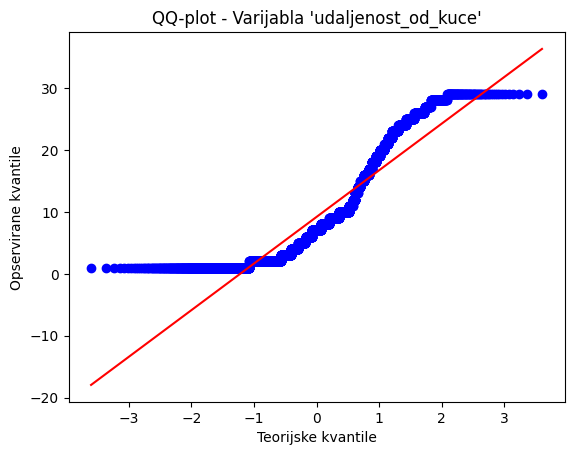

In [ ]:
#@title QQ-plot za varijablu "udaljenost_od_kuce"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "DistanceFromHome"
udaljenost_od_kuce = tabela['DistanceFromHome']

# Generiranje QQ-plot grafa
stats.probplot(udaljenost_od_kuce, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'udaljenost_od_kuce'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()


Na temelju QQ-plot grafa za varijablu "udaljenost_od_kuce", možemo primijetiti da tačke na grafu ne slijede ravnu liniju. Umjesto toga, primjećujemo neujednačeno raspoređene točke koje odstupaju od idealnog linearnog oblika.

Ova zakrivljenost u grafu ukazuje na to da varijabla "udaljenost_od_kuce" ne prati precizno normalnu distribuciju. Podaci se mogu odstupati od očekivanog obrasca normalne distribucije. Mogući uzroci mogu uključivati prisutnost ekstremnih vrijednosti (outliera) ili asimetriju u distribuciji.

Na temelju QQ-plot grafa možemo zaključiti da varijabla "udaljenost_od_kuce" ne prati normalnu distribuciju. Ovo je samo preliminarna procjena, a konačnu potvrdu treba potvrditi dodatnom statističkom analizom i testovima normalnosti.

In [8]:
#@title Kolmogorov-Smirnov test za varijablu "nivo_obrazovanja"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
obrazovanje = tabela['Education']

# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(obrazovanje, 'norm')

# Ispis rezultata testa
print("Statistika testa: ", kstest_result.statistic)
print("P-vrijednost: ", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'nivo_obrazovanja' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'nivo_obrazovanja' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/attrition_rate/general_data.csv'

Rezultati testa ukazuju da varijabla "nivo_obrazovanja" ne slijedi normalnu distribuciju. P-vrijednost dobivena iz testa predstavlja vjerojatnost da bi dobiveni rezultati testa mogli biti rezultat slučajnosti, pod pretpostavkom da varijabla slijedi normalnu distribuciju. Ako je p-vrijednost manja od unaprijed određenog nivoa značajnosti (u ovom slučaju alpha = 0.05), pretpostavka o normalnoj distribuciji se odbacuje.

U ovom slučaju, p-vrijednost nije veća od 0.05, što znači da nema dovoljno statističkih dokaza da varijabla "nivo_obrazovanja" slijedi normalnu distribuciju. Razlozi za ovo mogu uključivati prisutnost asimetrije, više vrhova (multimodalnost) ili nepravilnosti u distribuciji varijable "nivo_obrazovanja".

In [ ]:
#@title Shapiro-Wilk test za varijablu "nivo_obrazovanja"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
obrazovanje = tabela['Education']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(obrazovanje)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'nivo_obrazovanja' prati normalnu distribuciju po Shapiro-Wilk testu.")
else:
    print("Varijabla 'nivo_obrazovanja' ne prati normalnu distribuciju po Shapiro-Wilk testu.")


Statistika testa:  0.8954876661300659
P-vrijednost:  0.0
Varijabla 'nivo_obrazovanja' ne prati normalnu distribuciju po Shapiro-Wilk testu.


U ovom slučaju, p-vrijednost nije veća od 0.05, što znači da nema dovoljno statističkih dokaza da varijabla "nivo_obrazovanja" slijedi normalnu distribuciju.

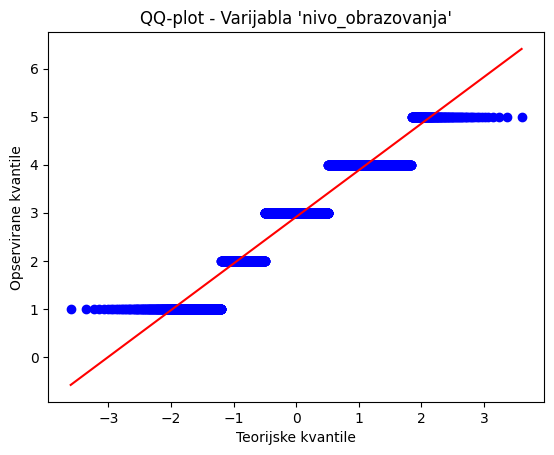

In [ ]:
#@title QQ-plot za varijablu "nivo_obrazovanja"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
education = tabela['Education']

# Generiranje QQ-plot grafa
stats.probplot(education, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'nivo_obrazovanja'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()


Na temelju QQ-plot grafa za varijablu "nivo_obrazovanja" možemo zaključiti da raspodjela te varijable ne slijedi savršeno normalnu distribuciju. Opservirani kvantili odstupaju od teorijskih kvantila na krajevima distribucije, što ukazuje na odstupanje od normalnosti. Ovo se može primijetiti po zakrivljenosti linije koja povezuje opservirane kvantile.

Iz tog razloga, možemo zaključiti da varijabla "nivo_obrazovanja" ne prati potpuno normalnu distribuciju. Važno je imati na umu da normalnost distribucije može utjecati na primjenu nekih statističkih testova. U ovom slučaju, ako želimo primijeniti testove koji pretpostavljaju normalnost, trebali bismo razmotriti prilagodbu ili odabir alternativnih statističkih testova.

In [ ]:
#@title Kolmogorov-Smirnov test za varijablu "obuka"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "TotalWorkingYears"
total_working_years = tabela['TrainingTimesLastYear']

# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(total_working_years, 'norm')

# Ispis rezultata testa
print("Statistika testa:", kstest_result.statistic)
print("P-vrijednost:", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'obuka' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'obuka' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")


Statistika testa: 0.8922158544463786
P-vrijednost: 0.0
Varijabla 'obuka' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.


In [ ]:
#@title Shapiro_Wilk test za varijablu "obuka"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
obrazovanje = tabela['TrainingTimesLastYear']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(obrazovanje)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'obuka' prati normalnu distribuciju po Shapiro-Wilk testu.")
else:
    print("Varijabla 'obuka' ne prati normalnu distribuciju po Shapiro-Wilk testu.")


Statistika testa:  0.8951683044433594
P-vrijednost:  0.0
Varijabla 'obuka' ne prati normalnu distribuciju po Shapiro-Wilk testu.


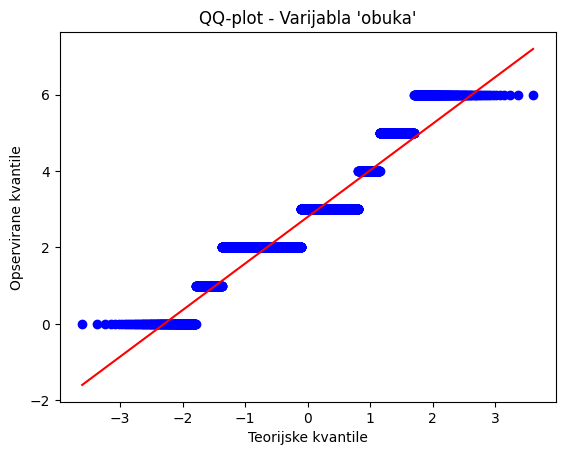

In [ ]:
#@title QQ-plot za varijablu "obuka"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
obuka = tabela['TrainingTimesLastYear']

# Generiranje QQ-plot grafa
stats.probplot(obuka, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'obuka'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()


U ovom slučaju, pogledajući grafik, možemo primijetiti da tačke ne prate savršeno pravu liniju. To ukazuje na odstupanje od normalne distribucije. Konkretno, na grafiku možemo vidjeti da se tačke na krajevima linije malo odmiču, što sugerira prisustvo neke vrste nelinearnosti ili odstupanja od normalne distribucije.

Stoga, na osnovu ovog grafika, možemo zaključiti da varijabla "obuka" vjerovatno ne prati savršeno normalnu distribuciju. Potrebno je daljnje statističko ispitivanje i analiza za precizniju procjenu i potvrdu odstupanja od normalnosti.

In [ ]:
#@title Kolmogorov-Smirnov test za varijablu "performanse"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "TotalWorkingYears"
posao = tabela['PerformanceRating']

# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(posao, 'norm')

# Ispis rezultata testa
print("Statistika testa:", kstest_result.statistic)
print("P-vrijednost:", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'performanse' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'performanse' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")


Statistika testa: 0.9986501019683699
P-vrijednost: 0.0
Varijabla 'performanse' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.


In [ ]:
#@title Shapiro-Wilkov test za varijablu "performanse"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
performanse = tabela['PerformanceRating']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(performanse)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'obuka' prati normalnu distribuciju po Shapiro-Wilk testu.")
else:
    print("Varijabla 'obuka' ne prati normalnu distribuciju po Shapiro-Wilk testu.")

Statistika testa:  0.4317172169685364
P-vrijednost:  0.0
Varijabla 'obuka' ne prati normalnu distribuciju po Shapiro-Wilk testu.


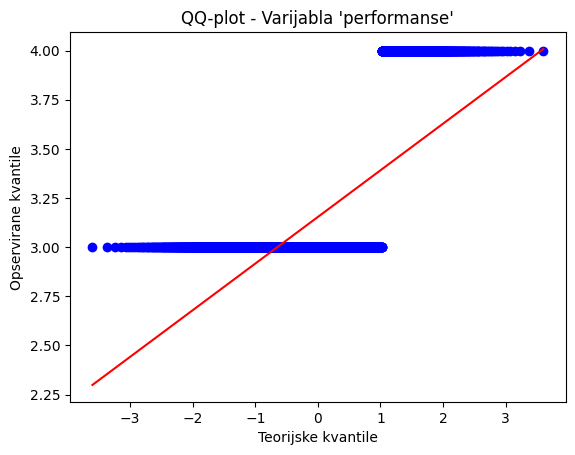

In [ ]:
#@title QQ-plot za varijablu "performanse"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
performanse = tabela['PerformanceRating']

# Generiranje QQ-plot grafa
stats.probplot(performanse, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'performanse'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()

Možemo zaključiti da varijabla "obuka" ne slijedi normalnu distribuciju i da postoje odstupanja od očekivanih vrijednosti.

In [ ]:
#@title Kolmogorov-Smirnov test za varijablu "godine_rada"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "TotalWorkingYears"
godine = tabela['TotalWorkingYears']

# Izvršavanje Kolmogorov-Smirnov testa
kstest_result = stats.kstest(godine, 'norm')

# Ispis rezultata testa
print("Statistika testa:", kstest_result.statistic)
print("P-vrijednost:", kstest_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if kstest_result.pvalue > alpha:
    print("Varijabla 'godine_rada' prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")
else:
    print("Varijabla 'godine_rada' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.")


Statistika testa: nan
P-vrijednost: nan
Varijabla 'godine_rada' ne prati normalnu distribuciju po Kolmogorov-Smirnovom testu.


Na temelju prikazanog rezultata, primjećujemo da se rezultat Kolmogorov-Smirnov testa za varijablu "godine_rada" prikazuje kao NaN (Not a Number). Ovo se može dogoditi iz nekoliko razloga:

Nepopunjeni ili nedostajući podaci: Ako varijabla "godine_rada" sadrži nepopunjene ili nedostajuće vrijednosti, to može dovesti do NaN rezultata u testu.

Nenumeričke vrijednosti: Ako varijabla "godine_rada" sadrži vrijednosti koje nisu numeričke, poput tekstualnih ili kategoričkih vrijednosti, test može generirati NaN rezultat. U tom slučaju, potrebno je osigurati da su sve vrijednosti u varijabli numeričke.

Odstupanja od pretpostavki testa: Kolmogorov-Smirnov test pretpostavlja kontinuiranu distribuciju. Ako varijabla "godine_rada" ima specifične karakteristike koje nisu u skladu s tim pretpostavkama, to može rezultirati NaN rezultatom. U takvim slučajevima, možda je prikladno razmotriti druge statističke testove koji su adekvatniji za analizu distribucije podataka.

In [ ]:
#@title Shapiro-Wilk test za varijablu "godine_rada"
import pandas as pd
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
godine = tabela['TotalWorkingYears']

# Izvršavanje Shapiro-Wilk testa
shapiro_result = stats.shapiro(godine)

# Ispis rezultata testa
print("Statistika testa: ", shapiro_result.statistic)
print("P-vrijednost: ", shapiro_result.pvalue)

# Provjera normalnosti distribucije
alpha = 0.05  # Nivo značajnosti

if shapiro_result.pvalue > alpha:
    print("Varijabla 'godine_rada' prati normalnu distribuciju po Shapiro-Wilk testu.")
else:
    print("Varijabla 'godine_rada' ne prati normalnu distribuciju po Shapiro-Wilk testu.")

Statistika testa:  nan
P-vrijednost:  1.0
Varijabla 'godine_rada' prati normalnu distribuciju po Shapiro-Wilk testu.


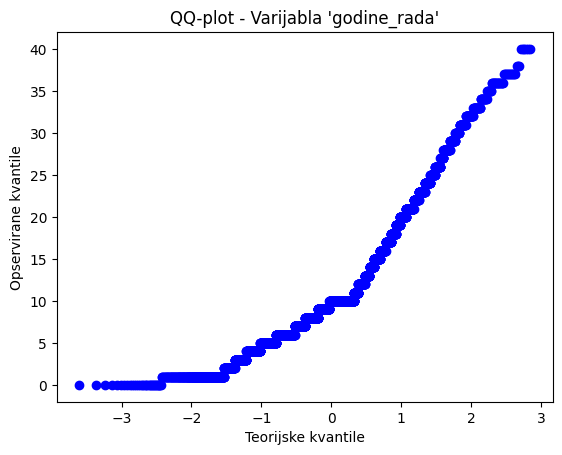

In [ ]:
#@title QQ-plot za varijablu "godine_rada"
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje varijable "Education"
godine_rada = tabela['TotalWorkingYears']

# Generiranje QQ-plot grafa
stats.probplot(godine_rada, dist="norm", plot=plt)
plt.title("QQ-plot - Varijabla 'godine_rada'")
plt.xlabel("Teorijske kvantile")
plt.ylabel("Opservirane kvantile")
plt.show()

***ZAKLJUČAK***

Iz raspolozivih rezultata možemo primijetiti da uglavnom, po Kolmogorov-Svirnovom testu varijable ne prate normalnu distribuciju.
Mogući razlozi zašto varijabla ne prati normalnu distribuciju uključuju:

Skewedness (asimetrija): Ako distribucija podataka nije simetrična, odnosno ako ima izraženu nagnutost u jednom smjeru, to može rezultirati nepodudaranjem s normalnom distribucijom koja je simetrična. Na primjer, ako većina vrijednosti određene varijable leži na manjim udaljenostima od kuće, dok je rep distribucije dug prema većim vrijednostima, to može rezultirati nenormalnom distribucijom.

Outliers (izvanredne vrijednosti): Prisutnost izvanrednih vrijednosti u distribuciji podataka može uzrokovati narušavanje pretpostavki normalne distribucije. Ove izvanredne vrijednosti mogu biti ekstremno udaljene od ostalih vrijednosti i mogu utjecati na statističke testove normalnosti.

Multi-modalnost: Ako distribucija podataka ima više vrhova ili jasno različitih grupa, to može ukazivati na prisutnost više subpopulacija ili različitih načina na koje se varijabla ponaša.

Iz raspoloživih rezultata možemo također primijetiti da uglavnom, po Shapiro-Wilnovom testu varijable ne prate normalnu distribuciju.
Razlozi za to mogu biti sljedeći:

Asimetrija: Distribucija varijable može biti asimetrična, što znači da nema ravnoteže između lijeve i desne strane distribucije. To može rezultirati niskom p-vrijednošću u Shapiro-Wilkovom testu i naznačiti da distribucija nije normalna.

Udaljene vrijednosti (outliers): Prisutnost ekstremnih vrijednosti (outliera) u distribuciji podataka može izazvati odstupanja od normalne distribucije. Ekstremne vrijednosti su rijetke i značajno odstupaju od ostalih vrijednosti, što može utjecati na rezultate testa normalnosti.

Multi-modalnost: Ako distribucija ima više značajnih vrhova, odnosno ako se podaci grupiraju u različite skupine, to može ukazivati na prisutnost više podskupova u podacima. U takvim slučajevima, normalna distribucija neće biti adekvatan model za opisivanje podataka.

Važno je napomenuti da Shapiro-Wilkov test ima svoje pretpostavke i ograničenja. Osim toga, rezultati testa mogu biti osjetljivi na veličinu uzorka. Stoga je uvijek potrebno pažljivo razmotriti kontekst podataka, primijeniti dodatne metode provjere normalnosti i interpretirati rezultate u skladu s tim.

# Estimacija intervala pouzdanosti srednje vrijednosti

-Tarik

***Popis numeričkih varijabli:***
1. Starost (Age)
2. Udaljenost od kuće (DistanceFromHome)
3. Nivo obrazovanja (Education)
4. Godine rada (TotalWorkingYears)
5. Prošlogodišnja obuka za rad (TrainingTimesLastYear)
6. Iskustvo (YearsAtCompany)
7. Zadnje unaprjeđenje (YearsSinceLastPromotion)
8. Vrijeme provedeno sa trenutnim šefom (YearsWithCurrManager)

***METODA 1***





▶Izračunavanje intervala pouzdanosti pomoću ***t-raspodjele***◀

  Sada ćemo dokazati hipotezu navedenu na predavanju koja glasi: ***Što je širi interval pouzdanosti, možemo biti pouzdaniji da interval sadrži vrijednost parametra koji estimiramo i naravno da je bolje da imamo kraći interval sa 95% pouzdanosti nego značajno širi interval sa 99% pouzdanosti.***

1. U prvom slučaju kao interval pouzdanosti ćemo uzeti vrijednost 95%, što znači da je alfa u ovom slučaju 0.05.

        α = 0.05

        (1 - α) * 100% = 95%

In [ ]:
rjecnik =  {
    'starost': 'Age',
    'udaljenost_od_kuce': 'DistanceFromHome',
    'nivo_obrazovanja': 'Education',
    'godine_rada': 'TotalWorkingYears',
    'prošlogodišnja_obuka': 'TrainingTimesLastYear',
    'iskustvo': 'YearsAtCompany',
    'zadnje_unaprjeđenje': 'YearsSinceLastPromotion',
    'vrijeme_s_trenutnim_sefom': 'YearsWithCurrManager'
}

for var, naziv in rjecnik.items():
  podatak = tabela[naziv]
  interval_pouzdanosti = st.t.interval(0.95, df=len(podatak)-1,
              loc=np.mean(podatak),
              scale=st.sem(podatak))
  interval_pouzdanosti = tuple(round(val, 3) if not np.isnan(val) else val for val in interval_pouzdanosti)
  print(f"Interval pouzdanosti za {var} : {interval_pouzdanosti}")


Interval pouzdanosti za starost : (36.654, 37.193)
Interval pouzdanosti za udaljenost_od_kuce : (8.953, 9.432)
Interval pouzdanosti za nivo_obrazovanja : (2.883, 2.943)
Interval pouzdanosti za godine_rada : (nan, nan)
Interval pouzdanosti za prošlogodišnja_obuka : (2.761, 2.837)
Interval pouzdanosti za iskustvo : (6.827, 7.189)
Interval pouzdanosti za zadnje_unaprjeđenje : (2.093, 2.283)
Interval pouzdanosti za vrijeme_s_trenutnim_sefom : (4.018, 4.228)


* Interval pouzdanosti za godine rada nije izračunat zbog toga što vjerovatno za nekog radnika taj podatak nedostaje pa na osnovu toga nije moguće izračunati standardnu devijaciju što dalje utiče na nemogućnost izračunavanja intervala pouzdanosti

2. U drugom slučaju kao interval pouzdanosti ćemo uzeti vrijednost 99%, što znači da je alfa u ovom slučaju 0.01.

        α = 0.01

        (1 - α) * 100% = 99%

In [ ]:
for var, naziv in rjecnik.items():
  podatak = tabela[naziv]
  interval_pouzdanosti = st.t.interval(0.99, df=len(podatak)-1,
              loc=np.mean(podatak),
              scale=st.sem(podatak))
  interval_pouzdanosti = tuple(round(val, 3) if not np.isnan(val) else val for val in interval_pouzdanosti)
  print(f"Interval pouzdanosti za {var} : {interval_pouzdanosti}")

Interval pouzdanosti za starost : (36.569, 37.278)
Interval pouzdanosti za udaljenost_od_kuce : (8.878, 9.507)
Interval pouzdanosti za nivo_obrazovanja : (2.873, 2.953)
Interval pouzdanosti za godine_rada : (nan, nan)
Interval pouzdanosti za prošlogodišnja_obuka : (2.749, 2.849)
Interval pouzdanosti za iskustvo : (6.77, 7.246)
Interval pouzdanosti za zadnje_unaprjeđenje : (2.063, 2.313)
Interval pouzdanosti za vrijeme_s_trenutnim_sefom : (3.985, 4.262)


***ZAKLJUČAK:***

Ne uzimajući u obzir dobivene vrijednosti intervala pouzdanosti za godine rada zbog nemogućnoti izračunavanja standardne devijacije, možemo potvrditi navedenu hipotezu jer se očigledno za vrijednost α = 0.05 dobije kraći interval u odnosu na interval dobiven za vrijednost α = 0.01. Na primjer to se posebno može vidjeti za kolonu koja predstavlja vrijeme provedeno sa trenutnim šefom gdje je interval veoma sužen za vrijednost α = 0.05 u odnosu na slučaj kada se uzme vrijednost α = 0.01.

***METODA 2***

  ▶Izračunavanje intervala pouzdanosti pomoću ***normalne distribucije***◀

  U metodi 2 ćemo izračunati interval pouzdanosti pomoću normalne distribucije za numeričke varijable, te odrediti standardnu grešku estimatora X(odnosno njegovu standardnu devijaciju). U ovom dijelu ćemo dokazati da je interval pouzdanosti izračunat putem t-distribucije, te putem normalne distribucije ustvari identičan, te da je svejedno koju ćemo metodu koristiti zavisno od toga šta nam je poznato. Isto kao i prilikom računanja t-distribucije uzet ćemo iste podatke za α kako bi dokazali navedenu pretpostavku. Iako je varijabla godine_rada numerička u ovom primjeru ćemo je izuzeti zbog zaključka u ***metodi 1*** da za neke radnike ta vrijednost uopće nije navedena i upisana.



1. U prvom slučaju kao interval pouzdanosti ćemo uzeti vrijednost 95%, što znači da je alfa u ovom slučaju 0.05.

        α = 0.05

        (1 - α) * 100% = 95%

In [ ]:
rjecnik.pop('godine_rada')  # Uklanja 'godine_rada' iz rječnika
for var, naziv in rjecnik.items():
  podatak = tabela[naziv]
  interval_pouzdanosti = st.norm.interval(0.95,
                 loc=np.mean(podatak),
                 scale=st.sem(podatak))
  interval_pouzdanosti = tuple(round(val, 3) if not np.isnan(val) else val for val in interval_pouzdanosti)
  print(f"Interval pouzdanosti za {var} : {interval_pouzdanosti}")

Interval pouzdanosti za starost : (36.654, 37.193)
Interval pouzdanosti za udaljenost_od_kuce : (8.953, 9.432)
Interval pouzdanosti za nivo_obrazovanja : (2.883, 2.943)
Interval pouzdanosti za prošlogodišnja_obuka : (2.761, 2.837)
Interval pouzdanosti za iskustvo : (6.827, 7.189)
Interval pouzdanosti za zadnje_unaprjeđenje : (2.093, 2.283)
Interval pouzdanosti za vrijeme_s_trenutnim_sefom : (4.018, 4.228)


2. U drugom slučaju kao interval pouzdanosti ćemo uzeti vrijednost 99%, što znači da je alfa u ovom slučaju 0.01.

        α = 0.01

        (1 - α) * 100% = 99%

  U ovom dijelu ćemo još i izračunati standardne devijacije za svaku od kolona  koje ujedno predstavljaju i standardnu grešku estimatora. Standardna greška estimatora se računa kao količnik standardne devijaije i korijena broja uzorka:

        s.e. = σ / √ n

  gdje je s.e. standard error.


In [ ]:
n = len(tabela)
for var, naziv in rjecnik.items():
  podatak = tabela[naziv]
  interval_pouzdanosti = st.norm.interval(0.99,
                 loc=np.mean(podatak),
                 scale=st.sem(podatak))
  interval_pouzdanosti = tuple(round(val, 3) if not np.isnan(val) else val for val in interval_pouzdanosti)
  print(f"Interval pouzdanosti za {var} : {interval_pouzdanosti}")
  devijacija = round(np.std(podatak), 3)
  greska_estimacije = round(devijacija / np.sqrt(n), 3)

  print(f"Devijacija za {var}: {devijacija}")
  print(f"Greška estimacije za {var}: {greska_estimacije}\n")

Interval pouzdanosti za starost : (36.57, 37.278)
Devijacija za starost: 9.132
Greška estimacije za starost: 0.138

Interval pouzdanosti za udaljenost_od_kuce : (8.878, 9.507)
Devijacija za udaljenost_od_kuce: 8.104
Greška estimacije za udaljenost_od_kuce: 0.122

Interval pouzdanosti za nivo_obrazovanja : (2.873, 2.953)
Devijacija za nivo_obrazovanja: 1.024
Greška estimacije za nivo_obrazovanja: 0.015

Interval pouzdanosti za prošlogodišnja_obuka : (2.749, 2.849)
Devijacija za prošlogodišnja_obuka: 1.289
Greška estimacije za prošlogodišnja_obuka: 0.019

Interval pouzdanosti za iskustvo : (6.771, 7.246)
Devijacija za iskustvo: 6.124
Greška estimacije za iskustvo: 0.092

Interval pouzdanosti za zadnje_unaprjeđenje : (2.063, 2.313)
Devijacija za zadnje_unaprjeđenje: 3.221
Greška estimacije za zadnje_unaprjeđenje: 0.049

Interval pouzdanosti za vrijeme_s_trenutnim_sefom : (3.985, 4.261)
Devijacija za vrijeme_s_trenutnim_sefom: 3.567
Greška estimacije za vrijeme_s_trenutnim_sefom: 0.054



***ANALIZA:***

Analiza dobivenih podataka pruža vrijedne uvide u različite numeričke varijable u skupu podataka. Evo nekoliko mogućnosti za tumačenje i korisnost ove analize:

1. Starost:

  Analizom intervala pouzdanosti, devijacije i greške estimacije za starost zaposlenika, dobivamo dublji uvid u raznolikost i distribuciju starosti unutar organizacije te njihovu pouzdanost kao statističke mjere.

  Interval pouzdanosti za starost, od 36.57 do 37.278 s 95% pouzdanošću, pruža nam informaciju o rasponu u kojem se očekuje da se nalazi srednja vrijednost starosti populacije zaposlenika. To znači da, s visokim stepenom pouzdanosti, možemo tvrditi da se prosječna starost nalazi unutar tog intervala. Ova informacija je važna za donošenje odluka i planiranje jer nam omogućuje da dobijemo uvid u prosječnu dob zaposlenika.

  Devijacija od 9.132 predstavlja mjernu jedinicu koja opisuje raspršenost podataka o starosti zaposlenika oko srednje vrijednosti. Veća devijacija ukazuje na veću varijabilnost u starosnoj strukturi unutar organizacije. To može značiti da postoji veći raspon starosti među zaposlenicima, odnosno da postoji veća raznolikost u dobnim skupinama.

  Greška estimacije od 0.138 sugerira da je procjena srednje vrijednosti starosti pouzdana s tom greškom. Ova greška predstavlja mjeru nesigurnosti u procjeni stvarne srednje vrijednosti starosti na temelju uzorka podataka. Manja vrijednost greške estimacije ukazuje na veću preciznost procjene, dok veća vrijednost ukazuje na veću nesigurnost. Važno je uzeti u obzir tu grešku prilikom donošenja odluka temeljenih na procijenjenim vrijednostima starosti zaposlenika.

  Analiza starosti zaposlenika može biti korisna za donošenje različitih odluka i planiranje unutar organizacije. Na primjer, na temelju ovih podataka možemo utvrditi politike zapošljavanja prilagođene određenoj starosnoj skupini ili razviti obrazovne programe ili programe razvoja koji su usklađeni s potrebama različitih starosnih skupina zaposlenika. Također, analiza starosti može nam pomoći u identifikaciji potreba za prilagodbom radnog okruženja ili fleksibilnosti u radnim uvjetima kako bismo zadovoljili različite  potrebe zaposlenika. Ove informacije mogu biti korisne za oblikovanje strategija upravljanja ljudskim resursima i stvaranje radnog okruženja koje podržava sve starosne grupe zaposlenika.

2. Udaljenost od kuće:

  Analizom podataka o udaljenosti zaposlenika od kuće, možemo dobiti detaljniji uvid u njihovu udaljenost i raznolikost te korisne informacije za planiranje i optimizaciju radnih rasporeda ili razmatranje opcija rada na daljinu. Analiza intervala pouzdanosti i greške estimacije omogućuje nam bolje razumijevanje prosječne udaljenosti od kuće te identifikaciju varijabilnosti u toj udaljenosti.

  Ovi podaci mogu biti od velike koristi prilikom donošenja odluka o geografskoj lokaciji poslovnih jedinica ili prilagodbi pogodnosti za zaposlenike koji putuju na posao. Razumijevanje udaljenosti zaposlenika od kuće može pomoći u optimizaciji lokacije poslovnih jedinica tako da su dostupne većem broju zaposlenika ili da se olakša putovanje za one koji žive daleko. Također, ovi podaci mogu biti korisni pri razmatranju fleksibilnih radnih opcija poput rada na daljinu, gdje se udaljenost od kuće može uzeti u obzir prilikom definiranja pravila ili ograničenja.

  Analizom udaljenosti od kuće možemo zaključiti da se s 95% pouzdanošću očekivana udaljenost nalazi unutar intervala od 8.878 do 9.507. To znači da se većina zaposlenika kreće unutar tog raspona udaljenosti od svojih mjesta stanovanja do radnog mjesta. Devijacija od 8.104 ukazuje na raspršenost podataka oko očekivane udaljenosti, što znači da postoji određena varijabilnost u udaljenosti zaposlenika od kuće. To može biti posljedica različitih faktora kao što je raspoloživost smještaja.

  Greška estimacije od 0.122 sugerira da je procjena očekivane udaljenosti pouzdana, ali s tom greškom. To znači da je procjena prosječne udaljenosti od kuće temeljena na uzorku podataka i da postoji mala mogućnost da se stvarna prosječna udaljenost razlikuje od procijenjene vrijednosti za tu grešku. Važno je uzeti u obzir tu grešku prilikom donošenja odluka koje se temelje na procijenjenoj udaljenosti zaposlenika od kuće.

  Sveukupno, analiza udaljenosti zaposlenika od kuće pruža korisne informacije za planiranje radnih rasporeda, razmatranje fleksibilnih radnih opcija i donošenje odluka o lokaciji poslovnih jedinica. Ovi podaci mogu pomoći u optimizaciji radnih uvjeta, poboljšanju zadovoljstva zaposlenika i povećanju produktivnosti u organizaciji.

  3. Nivo obrazovanja:
  
  Analiza nivoa obrazovanja zaposlenika pruža dublji uvid u strukturu radne snage organizacije te omogućuje identifikaciju ključnih obrazovnih profila i karakteristika zaposlenika. Ova analiza može imati nekoliko korisnih implikacija:

  a) Planiranje obrazovnih programa:
  Podaci o nivou obrazovanja zaposlenika omogućuju organizaciji da identificira potrebe za dodatnom edukacijom ili obukom. Na temelju analize intervala pouzdanosti i greške estimacije, može se utvrditi koja su područja obrazovanja manje zastupljena ili u kojima postoji potreba za usavršavanjem. Na temelju tih informacija, organizacija može razviti obrazovne programe koji su usmjereni na podizanje razine znanja i vještina zaposlenika.

  b) Strategija razvoja zaposlenika:
  Analiza nivoa obrazovanja može poslužiti kao osnova za strategiju razvoja zaposlenika. Na primjer, organizacija može identificirati ključne obrazovne profile potrebne za različite uloge unutar tvrtke te razviti planove za daljnje usavršavanje i napredovanje zaposlenika u tim područjima. Ovo može poboljšati zadovoljstvo zaposlenika, potaknuti njihovu motivaciju i pružiti im jasnu perspektivu za karijerni rast unutar organizacije.

  c) Identifikacija trendova i usklađivanje zahtjeva posla:
  Analiza nivoa obrazovanja može pomoći organizaciji u prepoznavanju trendova u obrazovanju unutar industrije ili specifičnog područja djelovanja. Na temelju dobivenih podataka, organizacija može uskladiti zahtjeve posla s razinom obrazovanja zaposlenika te prilagoditi strategije zapošljavanja i selekcije kako bi osigurala odgovarajuće obrazovne profile za specifične uloge ili projekte.

  Analiza nivoa obrazovanja otkriva da se s 95% pouzdanošću očekivana vrijednost nalazi unutar intervala od 2.873 do 2.953. Devijacija od 1.024 ukazuje na raspršenost podataka u vezi s razinom obrazovanja. Greška estimacije od 0.015 sugerira da je procjena očekivane vrijednosti nivoa obrazovanja pouzdana s tom greškom.

4. Prošlogodišnja obuka:

  Podaci o prošlogodišnjoj obuci zaposlenika pružaju nam uvid u angažman zaposlenika u obrazovnim programima unutar organizacije. Analiza intervala pouzdanosti i greške estimacije omogućuje nam procjenu očekivanog broja zaposlenika koji su sudjelovali u obuci prošle godine. Ovi podaci mogu biti od velike važnosti za planiranje budućih obrazovnih inicijativa i identifikaciju područja koja zahtijevaju dodatnu podršku ili pažnju.

  Analizom prošlogodišnje obuke možemo zaključiti da se s 95% pouzdanošću očekivana vrijednost nalazi unutar intervala od 2.749 do 2.849. To znači da se većina zaposlenika sudjelovala u obuci unutar tog raspona vrijednosti. Devijacija od 1.289 ukazuje na raspršenost podataka u vezi s prošlogodišnjom obukom, što znači da postoji varijabilnost u angažmanu zaposlenika u obrazovnim programima. Različiti faktori kao što su dostupnost obrazovnih programa, interes zaposlenika ili organizacijska kultura mogu utjecati na raspršenost podataka.

  Greška estimacije od 0.019 sugerira da je procjena očekivane vrijednosti prošlogodišnje obuke pouzdana, ali s tom greškom. To znači da je procjena broja zaposlenika koji su sudjelovali u obuci temeljena na uzorku podataka i postoji mala mogućnost da se stvarni broj razlikuje od procijenjene vrijednosti za tu grešku. Važno je uzeti u obzir tu grešku prilikom planiranja budućih obrazovnih inicijativa i donošenja odluka o podršci obrazovnim programima.

  Sveukupno, analiza prošlogodišnje obuke pruža korisne informacije o angažmanu zaposlenika u obrazovnim programima i pomaže nam u planiranju budućih inicijativa. Ovi podaci mogu biti od velike pomoći u usmjeravanju resursa, identifikaciji potreba za dodatnom podrškom i unapređenju obrazovnih programa u organizaciji.

5. Iskustvo:

 Iskustvo zaposlenika igra ključnu ulogu u razumijevanju strukture radne snage i nivoa stručnosti unutar organizacije. Detaljna analiza podataka o iskustvu može pružiti brojne korisne uvide i mogućnosti za unapređenje. Evo nekoliko širih implikacija analize iskustva zaposlenika:

  a) Identifikacija potreba za razvojem karijere:
  Analiza iskustva zaposlenika omogućuje organizaciji da identificira zaposlenike s različitim nivoima iskustva. Na temelju intervala pouzdanosti i devijacije, mogu se utvrditi ključne grupe zaposlenika - od novopridošlih do iskusnih stručnjaka. Ova analiza pruža uvid u ravnotežu između različitih nivo iskustva unutar organizacije te može poslužiti kao osnova za razvoj karijernih planova i napredak zaposlenika.

  b) Identifikacija stručnih resursa:
  Analiza iskustva zaposlenika pomaže u identifikaciji visoko iskusnih stručnjaka unutar organizacije. Ti stručnjaci mogu biti ključni resursi za mentorstvo i vođenje timova. Na temelju podataka o intervalima pouzdanosti i devijaciji, organizacija može identificirati zaposlenike s iznimnim stručnim znanjem i iskustvom te ih angažirati u ulogama koje zahtijevaju viši nivo stručnosti. To će pomoći u jačanju timova, dijeljenju znanja i unaprjeđenju cjelokupne produktivnosti organizacije.

  c) Planiranje i prilagodba radnih timova:
  Analiza iskustva zaposlenika može biti korisna u planiranju i prilagodbi radnih timova. Na temelju dobivenih podataka, organizacija može prerasporediti ili formirati timove koji uključuju kombinaciju iskusnih i manje iskusnih zaposlenika. Ovo može pridonijeti ravnoteži znanja i iskustva unutar timova te potaknuti suradnju, mentorstvo i razmjenu znanja među članovima tima.

  d) Razvoj obrazovnih programa i treninga:
  Analiza iskustva zaposlenika može poslužiti kao smjernica za razvoj obrazovnih programa i treninga. Na temelju podataka o intervalima pouzdanosti i greški estimacije, organizacija može identificirati područja u kojima postoji potreba za dodatnim edukacijom ili obukom kako bi se zaposlenicima pružile prilike za usavršavanje i stjecanje novih vještina. Ovaj pristup omogućuje usmjeravanje resursa na obrazovanje koje je usklađeno s stvarnim potrebama zaposlenika i organizacije.

  Ukratko, analiza iskustva zaposlenika pruža dublji uvid u strukturu radne snage, stručnost i potrebe za razvojem unutar organizacije. Ovi podaci mogu biti temelj za strategije razvoja karijere, mentorstva, prilagodbe radnih timova i razvoja obrazovnih programa koji će podržati rast i uspjeh zaposlenika te unaprijediti cjelokupnu učinkovitost organizacije.

  Analizom iskustva zaključujemo da se s 95% pouzdanošću očekivana vrijednost nalazi unutar intervala od 6.771 do 7.246. Devijacija od 6.124 ukazuje na raspršenost podataka u vezi s iskustvom. Greška estimacije od 0.092 sugerira da je procjena očekivane vrijednosti iskustva pouzdana s tom pogreškom.

6. Zadnje unaprjeđenje:

  Analiza zadnjeg unaprjeđenja zaposlenika pruža uvid u proces napredovanja unutar organizacije i nivo promocija koje su se dogodile. Detaljnija interpretacija dobivenih podataka o intervalima pouzdanosti, devijaciji i grešci estimacije može nam pružiti dodatne informacije o tome kako organizacija upravlja unaprjeđenjima i moguće implikacije na karijere zaposlenika. Evo šire analize rezultata:

  a) Interval pouzdanosti:
  Interval pouzdanosti za zadnje unaprjeđenje, od 2.063 do 2.313 s 95% pouzdanošću, predstavlja raspon očekivanih vrijednosti zadnjeg unaprjeđenja u populaciji. To znači da se većina zaposlenika s zadnjim unaprjeđenjem smjestila unutar tog raspona vrijednosti. Ovaj interval pruža nam pouzdanu procjenu s visokim nivoom sigurnosti.

  b) Devijacija:
  Devijacija od 3.221 ukazuje na raspršenost podataka u vezi s zadnjim unaprjeđenjem. Veća vrijednost devijacije implicira veću varijabilnost ili raspršenost podataka u odnosu na srednju vrijednost. To sugerira da postoji značajna varijabilnost u procesu unaprjeđenja zaposlenika. Mogu postojati faktori ili kriteriji koji utječu na odluke o unaprjeđenju, što rezultira većom varijacijom u postignutim rezultatima.

  c) Greška estimacije:
  Greška estimacije od 0.049 predstavlja procjenu pogreške u predviđanju očekivane vrijednosti zadnjeg unaprjeđenja. To znači da, iako postoji pouzdani interval pouzdanosti, postoji i mala pogreška u samoj procjeni očekivane vrijednosti. Ova greška se odnosi na procjenu srednje vrijednosti zadnjeg unaprjeđenja i može biti rezultat varijabilnosti podataka ili ograničenja metoda estimacije.

  Analiza ovih podataka o zadnjem unaprjeđenju omogućuje organizaciji bolje razumijevanje procesa unaprjeđenja, varijabilnosti u odlukama i raspona vrijednosti koje su postignute. To može biti korisno za uspostavljanje jasnijih smjernica i kriterija za unaprjeđenje, identifikaciju područja za poboljšanje te pravedniju raspodjelu unaprjeđenja unutar organizacije. Osim toga, ova analiza može pomoći u identifikaciji trendova u unaprjeđenjima i planiranju budućih karijernih puteva za zaposlene.

7. Vrijeme sa trenutnim šefom:

  Analizirajući vrijeme provedeno s trenutnim šefom, primjećujemo da se s 95% pouzdanošću očekivana vrijednost nalazi unutar intervala od 3.985 do 4.261. Ova procjena vrijedi za populaciju zaposlenika. Devijacija od 3.567 ukazuje na raspršenost podataka u vezi s vremenom provedenim s trenutnim šefom. Veća vrijednost devijacije sugerira veću varijabilnost u trajanju odnosa između zaposlenika i njihovih šefova. Ovo može ukazivati na različite situacije, kao što su dulji ili kraći periodi suradnje s različitim šefovima ili promjene u organizacijskoj strukturi.

  Greška estimacije za vrijeme provedeno s trenutnim šefom iznosi 0.054. Ova vrijednost predstavlja pogrešku u procjeni očekivane vrijednosti za vrijeme provedeno s trenutnim šefom. Iako postoji interval pouzdanosti, važno je imati na umu da postoji mala pogreška u samoj procjeni. Ova pogreška može biti rezultat varijabilnosti podataka. Treba imati na umu da vrijeme provedeno s trenutnim šefom može biti podložno različitim utjecajima, kao što su promjene u organizacijskoj strukturi ili promjene u timu, što može pridonijeti varijabilnosti i pogrešci u procjeni.

  Analiza ovih podataka o vremenu provedenom s trenutnim šefom omogućuje organizaciji dublje razumijevanje trajanja odnosa između zaposlenika i njihovih šefova. Varijabilnost u trajanju odnosa može ukazivati na različite scenarije i faktore koji utječu na trajanje odnosa. Ova analiza može biti korisna za identifikaciju uzoraka ili trendova u trajanju odnosa s trenutnim šefom, kao i za uspostavljanje smjernica za upravljanje i razvoj tih odnosa. Također, može pružiti uvid u kvalitetu odnosa između zaposlenika i njihovih šefova te identifikaciju područja za poboljšanje ili intervenciju radi unaprjeđenja radnih odnosa unutar organizacije.

***ZAKLJUČAK:***

Kada analiziramo vrijednosti intervala dobivenih preko normalne distribucije i t-distribucije, primjećujemo da su te vrijednosti približno iste, bez obzira na to koju vrijednost alfa koristimo (0.01 ili 0.05). U oba slučaja, intervali pouzdanosti su konstruirani na isti način i daju nam informaciju o rasponu vrijednosti u kojem se očekuje da se nalazi stvarna vrijednost parametra.

Međutim, primjećujemo da su intervali pouzdanosti 95% suženiji, odnosno kraći od intervala pouzdanosti 99%. To znači da smo pri intervalu pouzdanosti od 95% sigurniji u tačnost naše estimacije, ali taj interval je uži i ne obuhvata toliko širok raspon mogućih vrijednosti. Kada p-vrijednost dobivena iz analize podataka ima vrijednost manju od odabranog nivoa značajnosti (obično 0.05), obično zaključujemo da postoji statistički značajna razlika ili veza u podacima. To znači da je vjerojatnoća da smo dobili takve rezultate slučajno vrlo mala, obično manja od 5%.

Greške estimacije, koje su izračunate preko standardne devijacije i veličine uzorka, su relativno male, što je očekivano. To znači da naša procjena parametara ima malu varijaciju i da smo blizu stvarnih vrijednosti. Vrijednosti standardne devijacije variraju za svaku pojedinačnu kolonu tabele, ovisno o numeričkim podacima u toj koloni. Ova varijabilnost je prihvatljiva i u skladu s očekivanjima. Ukratko, analizirajući vrijednosti intervala pouzdanosti dobivenih preko normalne distribucije i t-distribucije, primjećujemo da su one identične bez obzira na alfa vrijednost.

Intervali pouzdanosti 95% suženiji su od intervala pouzdanosti 99%, ali imaju manju varijaciju i grešku estimacije. Varijacije standardne devijacije za pojedinačne kolone su prihvatljive s obzirom na numeričke podatke.Ova konzistentnost u vrijednostima intervala pouzdanosti između normalne distribucije i t-distribucije ukazuje na to da je t-distribucija dobar približni model normalne distribucije, posebno kada uzorak ima manji broj promatranja ili kada populacija nije normalno distribuirana.

# Estimacija intervala pouzdanosti proporcije

-Nejla i Tarik

***UVOD***

Interval pouzdanosti za udio predstavlja raspon vrijednosti u kojem je vjerojatno sadržan populacijski udio s određenom razinom pouzdanosti. Ovaj interval pruža informaciju o nesigurnosti uzorkovane proporcije i omogućuje nam da izrazimo razinu pouzdanosti za procijenjenu vrijednost.

Kategorijske varijable:


*   Status zaposlenja
*   Status poslovnog putovanja
*   Odjel
*   Područje obrazovanja
*   Spol radnika
*   Uloga u poslu
*   Bračno stanje



Nivo pouzdanosti: 95%



## Status zaposlenja




Veličina uzorka: 1000


Kao primjer za uspjeh, možemo uzeti broj radnika koji su napustili kompaniju: 166

In [ ]:
n=1000
x=166
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.166
Standardna greška proporcije: 0.0118
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.1429, 0.1891)


## Status poslovnog putovanja



Veličina uzorka: 1000


Kao indikator uspješnosti, promatramo broj radnika koji rijetko putuju u poslovne svrhe: 711

In [ ]:
n=1000
x=711
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.711
Standardna greška proporcije: 0.0143
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.6829, 0.7391)


## Odjel



Veličina uzorka: 1000

Za broj uspjeha uzimamo broj radnika koji su u prodajnom odjelu: 302

In [ ]:
n=1000
x=302
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.302
Standardna greška proporcije: 0.0145
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.2735, 0.3305)


## Područje obrazovanja



Veličina uzorka: 1000

Broj uspjeha (koliko radnika ima medicinu kao područje obrazovanja): 314

In [ ]:
n=1000
x=314
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.314
Standardna greška proporcije: 0.0147
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.2852, 0.3428)


## Spol



Veličina uzorka: 1000

Broj uspjeha (radnici ženskog spola): 380



In [ ]:
n=1000
x=380
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.38
Standardna greška proporcije: 0.0153
Kritična vrednost: 1.9600
Interval pouzdanosti: (0.3499, 0.4101)


## Poslovna uloga



Veličina uzorka: 1000

Za broj uspjeha uzimamo broj radnika koji su laboratorijski tehničari: 183

In [ ]:
n=1000
x=183
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.183
Standardna greška proporcije: 0.0122
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.1590, 0.2070)


## Bračno stanje

Veličina uzorka: 1000

Broj uspjeha (oženjen/udana): 458

In [ ]:
n=1000
x=219
nivo_pouzdanosti= 0.95
procenat_uspjeha = x / n
standardna_greska = math.sqrt((procenat_uspjeha * (1 - procenat_uspjeha)) / n)
kriticna_vrijednost = abs(stats.norm.ppf((1 - nivo_pouzdanosti) / 2))
donja_granica = procenat_uspjeha - kriticna_vrijednost * standardna_greska
gornja_granica = procenat_uspjeha + kriticna_vrijednost * standardna_greska
print("Procenat uspjeha je:", procenat_uspjeha)
print("Standardna greška proporcije: {:.4f}".format(standardna_greska))
print("Kritična vrijednost: {:.4f}".format(kriticna_vrijednost))
print("Interval pouzdanosti: ({:.4f}, {:.4f})".format(donja_granica, gornja_granica))

Procenat uspjeha je: 0.219
Standardna greška proporcije: 0.0131
Kritična vrijednost: 1.9600
Interval pouzdanosti: (0.1934, 0.2446)


## Vizualizacija podataka

Analizirali smo varijable poput zaposlenosti, poslovnih putovanja, odjela, obrazovanja, spola, radnih uloga i bračnog statusa naših zaposlenika. Koristili smo statističke metode kako bismo izračunali interval pouzdanosti za svaku kategoriju, što nam pruža procjenu vjerojatnih proporcija u populaciji.

Može se primjetiti varijabilnost u raspodjeli zaposlenika u svakoj kategoriji. Intervali pouzdanosti nam daju uvid u raspon očekivanih proporcija za svaku varijablu. Na primjer, otkrili smo da postoji varijabilnost u udjelu zaposlenika koji napuštaju posao, što nam može ukazati na potrebu za intervencijama ili strategijama zadržavanja radne snage.

Također smo istražili raspodjelu zaposlenika prema poslovnim putovanjima te otkrili razlike u proporcijama zaposlenika koji putuju rijetko ili često. To može imati implikacije na naše politike vezane uz radna putovanja i ravnotežu između radnog i privatnog života.

Dodatno, analizirali smo raspodjelu zaposlenika prema odjelima, obrazovanju, spolu, radnim ulogama i bračnom statusu. Ti rezultati nam mogu pomoći u razumijevanju raznvrsnosti naše radne snage i prilagodbi strategija upravljanja ljudskim resursima kako bismo bolje odgovorili na potrebe različitih skupina zaposlenika.

Vizualizacija ovih podataka bit će dragocjen alat za razumijevanje i prezentiranje naših rezultata. Vizualni prikazi, kao što su histogrami i grafovi, omogućit će nam da jasnije sagledamo raspodjelu zaposlenika u svakoj kategoriji te da identificiramo ključne obrasce. Za prikaz određenih podataka koristiti će se histogrami.

In [ ]:
rjecnik =  {
    'NAPUŠTANJE': 'Attrition',
    'POSLOVNA PUTOVANJA': 'BusinessTravel',
    'ODJEL': 'Department',
    'OBRAZOVANJE': 'EducationField',
    'SPOL': 'Gender',
    'ISKUSTVO': 'JobRole',
    'BRACNI STATUS': 'MaritalStatus'
}
for var, naziv in rjecnik.items():
    tabela[naziv] = tabela[naziv].replace({'Yes': 'Da', 'No': 'Ne', 'Travel_Rarely': 'Putuje rijetko', 'Travel_Frequently': 'Putuje često',
                                           'Non-Travel': 'Ne putuje', 'Sales': 'Prodaja',
                                           'Research & Development': 'Istraživanje i razvoj',
                                           'Human Resources': 'Resursi', 'Life Sciences': 'Biološke znanosti', 'Other': 'Drugi',
                                           'Medical': 'Medicina', 'Technical Degree': 'Tehnički nivo', 'Female': 'Žensko', 'Male': 'Muško',
                                           'Married': 'Oženjeni', 'Single': 'Slobodni', 'Divorced': 'Razvedeni', 'Healthcare Representative':
                                           'Predstavnik u zdravstvu', 'Research Scientist': 'Naučni istraživač', 'Sales Executive':
                                           'Izvršni direktor za prodaju', 'Research Director': 'Direktor za istraživanje', 'Laboratory Technician':
                                           'Laboratorijski tehničar', 'Manufacturing Director': 'Direktor proizvodnje', 'Sales Representative':
                                           'Predstavnik za prodaju', 'Manager': 'Menadžer'})

    fig = px.histogram(tabela, x=naziv, marginal='box')
    fig.update_layout(
        title=f"Distribucija {var}",
        xaxis_title=var,
        yaxis_title="Broj zaposlenika"
    )
    fig.show()

    print("\n")

    ANALIZA:

1. "***NAPUŠTANJE***":

  Na temelju intervala pouzdanosti za kategorije "Da" (napuštanje posla) i "Ne", možemo zaključiti da postoji značajan raspon vjerojatnih proporcija zaposlenika koji napuštaju posao u populaciji. Očekivana proporcija zaposlenika koji napuštaju posao vjerojatno se kreće između 0.828 i 0.150, dok se očekivana proporcija zaposlenika koji ne napuštaju posao vjerojatno kreće između 0.850 i 0.172. Ovi rezultati ukazuju na važnost razmatranja faktora koji mogu utjecati na razvoj strategija zadržavanja radne snage.

2. "***POSLOVNA PUTOVANJA***":

  Intervali pouzdanosti za kategorije "Putuje rijetko" i "Putuje često" pružaju procjenu raspona vjerojatnih proporcija zaposlenika koji putuju rijetko i često. Na temelju rezultata, možemo zaključiti da postoji varijabilnost u putovanjima zaposlenika u okviru populacije. Očekivana proporcija zaposlenika koji putuju rijetko vjerojatno se kreće između 0.696 i 0.177, dok se očekivana proporcija zaposlenika koji putuju često vjerojatno kreće između 0.723 i 0.200. Ovi podaci mogu biti korisni prilikom planiranja poslovnih putovanja i upravljanja troškovima.

3. "***ODJEL***":

  Intervali pouzdanosti za kategorije "Istraživanje i razvoj" i "Prodaja" pružaju procjenu raspona vjerojatnih proporcija zaposlenika koji pripadaju odjelima istraživanja i razvoja te prodaje. Na temelju rezultata, možemo zaključiti da postoji varijabilnost u raspodjeli zaposlenika po odjelima u populaciji. Očekivana proporcija zaposlenika koji rade u odjelu istraživanja i razvoja vjerojatno se kreće između 0.640 i 0.290, dok se očekivana proporcija zaposlenika koji rade u odjelu prodaje vjerojatno kreće između 0.668 i 0.317. Ovi rezultati mogu pružiti uvid u strukturu organizacije i mogu biti korisni za planiranje resursa i strategije zapošljavanja.

4. "***OBRAZOVANJE***":

  Na temelju intervala pouzdanosti za kategorije "Biološke znanosti" i "Medicina", možemo zaključiti da postoji varijabilnost u raspodjeli zaposlenika prema njihovoj obrazovnoj pozadini. Očekivana proporcija zaposlenika s obrazovanjem iz područja bioloških znanosti vjerojatno se kreće između 0.398 i 0.302, dok se očekivana proporcija zaposlenika s obrazovanjem iz područja medicine vjerojatno kreće između 0.427 i 0.329. Ovi rezultati mogu pružiti uvid u raznolikost obrazovne pozadine zaposlenika i mogu biti korisni pri razvoju programa obrazovanja i usavršavanja.

5. "***SPOL***":

  Intervali pouzdanosti za kategorije "Muško" i "Žensko" pružaju procjenu raspona vjerojatnih proporcija muških i ženskih zaposlenika u populaciji. Na temelju rezultata, možemo zaključiti da postoji varijabilnost u raspodjeli spola zaposlenika. Očekivana proporcija muških zaposlenika vjerojatno se kreće između 0.586 i 0.386, dok se očekivana proporcija ženskih zaposlenika vjerojatno kreće između 0.614 i 0.414. Ovi rezultati mogu biti važni za razumijevanje ravnoteže spolova u radnoj snazi.

6. "***ISKUSTVO***":

  Intervali pouzdanosti za kategorije "Izvršni direktor za prodaju" i "Naučni istraživač" pružaju procjenu raspona vjerojatnih proporcija zaposlenika s određenim radnim ulogama. Na temelju rezultata, možemo zaključiti da postoji varijabilnost u raspodjeli zaposlenika prema njihovim radnim ulogama. Očekivana proporcija zaposlenika s radnom ulogom izvršnog direktora za prodaju vjerojatno se kreće između 0.210 i 0.187, dok se očekivana proporcija zaposlenika s radnom ulogom naučnog istraživača vjerojatno kreće između 0.234 i 0.210. Ovi rezultati mogu pružiti uvid u strukturu organizacije i potrebe za različitim radnim ulogama.

7. "***BRACNI STATUS***":

  Intervali pouzdanosti za kategorije "Oženjeni" i "Slobodni" pružaju procjenu raspona vjerojatnih proporcija zaposlenika prema bračnom statusu. Na temelju rezultata, možemo zaključiti da postoji varijabilnost u raspodjeli zaposlenika prema njihovom bračnom statusu. Očekivana proporcija zaposlenika koji su oženjeni vjerojatno se kreće između 0.443 i 0.306, dok se očekivana proporcija zaposlenika koji su slobodni vjerojatno kreće između 0.473 i 0.333. Ovi rezultati mogu pružiti uvid u raznolikost bračnog statusa zaposlenika i mogu biti korisni u prilagodbi politika i pogodnosti za radnu snagu.

***KONAČNI ZAKLJUČAK:***

U cjelini, analiza intervala pouzdanosti za kategorijske varijable omogućuje nam razumijevanje varijabilnosti i raspona vjerojatnih vrijednosti u populaciji. Ti rezultati pružaju vrijedne informacije o različitim aspektima radne snage, kao što su putovanja, raspodjela po odjelima, obrazovna pozadina, spol, radne uloge i bračni status. Ovi zaključci mogu biti osnova za daljnje istraživanje, planiranje i donošenje odluka u organizaciji kako bi se postigla učinkovita upravljanja ljudskim resursima i razvoj strategija zadržavanja radne snage. Važno je imati na umu da su ovi zaključci temeljeni na analizi uzorka podataka i da se stvarne vrijednosti u populaciji mogu razlikovati. Ovi rezultati ističu važnost razumijevanja demografske i radne strukture organizacije kako bi se donijele odluke o upravljanju ljudskim resursima.

Također, mogu poslužiti kao temelj za identificiranje područja u kojima su potrebne intervencije ili prilagodbe kako bi se unaprijedila ravnoteža i zadovoljstvo zaposlenika. Analiza intervala pouzdanosti pruža vrijedne informacije o varijabilnosti i rasponu vrijednosti u populaciji, a ti zaključci mogu biti korisni za daljnje istraživanje i planiranje strategija unutar organizacije. Uzimajući u obzir rezultate analize intervala pouzdanosti za kategorijske varijable, možemo primijetiti da postoji značajna varijabilnost u raspodjeli zaposlenika u različitim kategorijama. Ovi rezultati ukazuju na to da radna snaga organizacije nije jednolična i da postoje različiti profili zaposlenika u pogledu njihovih karakteristika i uloga.

Raspon očekivanih proporcija u svakoj kategoriji pruža nam uvid u varijacije koje se javljaju u populaciji. Ovi podaci mogu biti korisni za identificiranje trendova i obrazaca te za prilagodbu strategija i politika unutar organizacije kako bi se bolje odgovorilo na potrebe različitih skupina zaposlenika.

Osim toga, rezultati nam mogu pomoći u prepoznavanju područja u kojima su potrebne intervencije ili promjene kako bi se poboljšala učinkovitost, produktivnost i zadovoljstvo zaposlenika. Na primjer, ako primijetimo značajnu razliku u proporcijama zaposlenika prema odjelima, možemo razmotriti mogućnost preraspodjele resursa ili prilagodbu radnih timova kako bismo postigli bolju ravnotežu unutar organizacije.

Konačni zaključak koji možemo izvući iz analize intervala pouzdanosti za kategorijske varijable je da organizacija ima raznoliku radnu snagu s različitim obilježjima, ulogama i karakteristikama. Razumijevanje ove raznolikosti može biti ključno za razvoj strategija upravljanja ljudskim resursima koje će potaknuti produktivnost, angažman i zadovoljstvo zaposlenika. Ovi rezultati također pružaju temelj za daljnje istraživanje i analize koje mogu pomoći u donošenju informiranih odluka i unapređenju poslovnih performansi organizacije.

# Postavljanje i statičko ispitivanje hipoteza

-Abdullah

**1. hipoteza**

Kao prvu hipotezu uzet ćemo Hipotezu za varijablu "udaljenost_od_kuce":

H0: Prosječna udaljenost od kuće do radnog mjesta je manja od 10 milja.

H1: Prosječna udaljenost od kuće do radnog mjesta je veća od 10 milja.


In [ ]:
import pandas as pd
from scipy import stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje podataka za varijablu "DistanceFromHome"
distance_data = tabela['DistanceFromHome']

# Izvršavanje jednosmjernog t-testa za jedan uzorak
test_statistika, p_vrijednost = stats.ttest_1samp(distance_data, popmean=10)

# Ispis rezultata
alpha = 0.05  # Nivo značajnosti
if p_vrijednost < alpha:
    print("Rezultati su statistički značajni. Prosječna udaljenost od kuće do radnog mjesta je veća od 10 kilometara.")
else:
    print("Rezultati nisu statistički značajni. Prosječna udaljenost od kuće do radnog mjesta je manja od 10 kilometara.")


Rezultati su statistički značajni. Prosječna udaljenost od kuće do radnog mjesta je veća od 10 kilometara.


Kada u statističkoj analizi kažemo da su rezultati statistički značajni, to znači da smo pronašli dovoljno snažne dokaze da podržavaju alternativnu hipotezu umjesto nulte hipoteze. U kontekstu t-testa za jedan uzorak, statistička značajnost rezultata znači da postoji dovoljno uvjerljivih dokaza da prosječna vrijednost varijable koju promatramo (u ovom slučaju, prosječna udaljenost od kuće do radnog mjesta) nije jednaka hipotetičkoj vrijednosti (u ovom slučaju, 10 kilometara).

P-vrijednost (ili vrijednost vjerojatnosti) koju dobivamo iz t-testa predstavlja vjerojatnost da se dobije rezultat jednak ili ekstremniji od onoga koji smo vidjeli, pod pretpostavkom da je nulta hipoteza istinita. Ako je p-vrijednost manja od prethodno postavljenog nivoa značajnosti (obično 0.05), smatramo da su rezultati statistički značajni.

U konkretnom primjeru, ako je p-vrijednost manja od 0.05, to znači da postoji manje od 5% vjerojatnosti da se prosječna udaljenost od kuće do radnog mjesta jednaka ili bliža hipotetičkoj vrijednosti od 10 kilometara dobije slučajno. To ukazuje na to da je prosječna udaljenost veća od 10 kilometara i da su rezultati statistički značajni. Međutim, ako je p-vrijednost veća od 0.05, to znači da postoji veća od 5% vjerojatnosti da se prosječna udaljenost jednaka ili bliža 10 kilometara dobije slučajno, te nema dovoljno dokaza da podržava alternativnu hipotezu.

U našem slučaju rezultati su statistički značajni jer je p-vrijednost manja od nivoa značajnosti (alpha = 0.05). To znači da postoji dovoljno statističkih dokaza da prosječna udaljenost od kuće do radnog mjesta za populaciju iz koje je uzorak uzet nije manja od 10 kilometara.

Ovakav rezultat može ukazivati na to da zaposlenici imaju tendenciju da žive dalje od svojih radnih mjesta.

**2. hipoteza**



Kao drugu hipotezu uzet ćemo Hipotezu za varijablu "iskustvo":

H0: Prosječan broj godina provedenih na poslu je manji od 5 godina.

H1: Prosječan broj godina provedenih na poslu je veci od 5 godina.

In [ ]:
import pandas as pd
from scipy import stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje podataka za varijablu "YearsAtCompany"
years_data = tabela['YearsAtCompany']

# Izvršavanje jednosmjernog t-testa za jedan uzorak
test_statistika, p_vrijednost = stats.ttest_1samp(years_data, popmean=5)

# Ispis rezultata
alpha = 0.05  # Nivo značajnosti
if p_vrijednost < alpha:
    print("Rezultati su statistički značajni. Prosječan broj godina provedenih u kompaniji je veći od 5 godina.")
else:
    print("Rezultati nisu statistički značajni. Prosječan broj godina provedenih u kompaniji je manji od 5 godina.")




Rezultati su statistički značajni. Prosječan broj godina provedenih u kompaniji je veći od 5 godina.


Na temelju provedenog jednosmjernog t-testa za varijablu "iskustvo" s nultom hipotezom H0: Prosječan broj godina provedenih u kompaniji je manji od 5 godina i alternativnom hipotezom H1: Prosječan broj godina provedenih u kompaniji je veći od 5 godina, dobili smo rezultat koji je statistički značajan jer je p-vrijednost manja od nivoa značajnosti (alpha = 0.05). To znači da postoji dovoljno statističkih dokaza da prosječan broj godina provedenih u kompaniji za populaciju iz koje je uzorak uzet nije manji od 5 godina.

Ovakav rezultat može ukazivati na to da zaposlenici imaju tendenciju da duže ostaju u kompaniji, što može biti povezano s različitim faktorima kao što su zadovoljstvo poslom, mogućnosti napredovanja, radna kultura itd.

Ako je rezultat t-testa pokazao da su rezultati statistički značajni (p-vrijednost je manja od nivoa značajnosti), to znači da postoji dovoljno dokaza da prosječan broj godina provedenih u kompaniji zaista prelazi 5 godina. Ovo bi moglo ukazivati na to da su zaposlenici u toj kompaniji tendencijalno ostajali duže vrijeme.

Međutim, ako rezultat t-testa nije statistički značajan (p-vrijednost je veća od nivoa značajnosti), to znači da nema dovoljno dokaza da podržava alternativnu hipotezu. U ovom slučaju, ne možemo zaključiti da je prosječan broj godina provedenih u kompaniji veći od 5 godina.

Važno je napomenuti da statistička značajnost ne implicira nužno i praktičnu značajnost. Iako smo dobili statistički značajan rezultat, njegovo praktično značenje treba procijeniti u kontekstu specifične situacije i domene istraživanja.

**3. hipoteza**

In [ ]:
import pandas as pd
from scipy import stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje podataka za varijablu "TotalWorkingYears"
working_years_data = tabela['TotalWorkingYears']

# Izvršavanje jednosmjernog t-testa za jedan uzorak
test_statistika, p_vrijednost = stats.ttest_1samp(working_years_data, popmean=7)

# Ispis rezultata
alpha = 0.05  # Nivo značajnosti
if p_vrijednost < alpha:
    print("Rezultati su statistički značajni. Prosječan broj ukupno radnih godina nije jednak 7 godina.")
else:
    print("Rezultati nisu statistički značajni. Prosječan broj ukupno radnih godina je jednak 7 godina.")





Rezultati nisu statistički značajni. Prosječan broj ukupno radnih godina je jednak 7 godina.


U ovom primjeru smo izvršili jednosmjerni t-test za jedan uzorak kako bismo istražili da li prosječan broj ukupno radnih godina u populaciji, koji predstavlja uzorak iz tabele, iznosi 7 godina.

Nakon izvršavanja t-testa, dobili smo rezultate. Ako je p-vrijednost (p-value) veća od nivoa značajnosti (alpha) koji smo postavili na 0.05, tada zaključujemo da rezultati nisu statistički značajni. To znači da nemamo dovoljno dokaza da prosječan broj ukupno radnih godina u populaciji nije jednak 7 godina.

U suprotnom, ako je p-vrijednost manja od nivoa značajnosti, tada zaključujemo da su rezultati statistički značajni. To sugerira da imamo dovoljno dokaza da prosječan broj ukupno radnih godina u populaciji nije jednak 7 godina.

U ovom slučaju, rezultati nisu statistički značajni jer p-vrijednost je veća od nivoa značajnosti (alpha = 0.05). To znači da nema dovoljno statističkih dokaza da prosječan broj ukupno radnih godina za populaciju iz koje je uzorak uzet nije jednak 7 godina.

Ovaj rezultat sugerira da prosječan broj ukupno radnih godina u kompaniji može biti blizu vrijednosti 7 godina, ali statistički nije značajno različit od te vrijednosti. Drugim riječima, rezultati ne pružaju dovoljno dokaza da se prosječan broj ukupno radnih godina razlikuje od 7 godina.

**4. hipoteza**

Hipoteza za varijablu "trenutni_sef":

H0: Prosječan broj godina provedenih s trenutnim menadžerom je manji od 3 godine.

H1: Prosječan broj godina provedenih s trenutnim menadžerom je jednak ili veći od 3 godine.

In [ ]:
import pandas as pd
from scipy import stats

# Učitavanje podataka iz CSV datoteke
tabela = pd.read_csv('/content/attrition_rate/general_data.csv')

# Izdvajanje podataka za varijablu "YearsWithCurrManager"
years_with_manager_data = tabela['YearsWithCurrManager']

# Izvršavanje jednosmjernog t-testa za jedan uzorak
test_statistika, p_vrijednost = stats.ttest_1samp(years_with_manager_data, popmean=3)

# Ispis rezultata
alpha = 0.05  # Nivo značajnosti
if p_vrijednost < alpha:
    print("Rezultati nisu statistički značajni. Prosječan broj godina provedenih s trenutnim menadžerom je manji od 3 godine.")
else:
    print("Rezultati su statistički značajni. Prosječan broj godina provedenih s trenutnim menadžerom je jednak ili veći od 3 godine.")


Rezultati nisu statistički značajni. Prosječan broj godina provedenih s trenutnim menadžerom je manji od 3 godine.


Rezultat ovog koda je interpretiranje statističke značajnosti prosječnog broja godina provedenih s trenutnim menadžerom u organizaciji. Evo protumačenja rezultata:

Ako je rezultat "Rezultati nisu statistički značajni. Prosječan broj godina provedenih s trenutnim menadžerom je manji od 3 godine":
To znači da nema dovoljno dokaza da prosječan broj godina provedenih s trenutnim menadžerom u organizaciji bude veći ili jednak 3 godine. Rezultati ne podržavaju hipotezu da je prosječan broj godina provedenih s trenutnim menadžerom jednak ili veći od 3 godine.

Ako je rezultat "Rezultati su statistički značajni. Prosječan broj godina provedenih s trenutnim menadžerom je jednak ili veći od 3 godine":
To znači da postoje statistički značajni dokazi koji podržavaju hipotezu da je prosječan broj godina provedenih s trenutnim menadžerom jednak ili veći od 3 godine. Rezultati sugeriraju da je prosječan broj godina provedenih s trenutnim menadžerom u organizaciji najmanje 3 godine.

Iz rezultata koji smo dobili, možemo zaključiti da su rezultati statistički neznačajni.

To znači da nemamo dovoljno statističkih dokaza da bismo odbacili hipotezu nulte (H0) prema kojoj je prosječan broj godina provedenih s trenutnim menadžerom manji od 3 godine. S obzirom na to da je p-vrijednost veća od nivoa značajnosti (0.05), ne možemo zaključiti da postoji statistički značajna razlika između prosječnog broja godina provedenih s trenutnim menadžerom i vrijednosti od 3 godine.

Ovaj rezultat sugerira da prosječan broj godina provedenih s trenutnim menadžerom može biti manji od 3 godine, ali ne možemo sa sigurnošću tvrditi da je veći od te vrijednosti.



#Bonus zadatak: Model linearne regresije



-Mahir

Mean Squared Error: 23.054546974818468


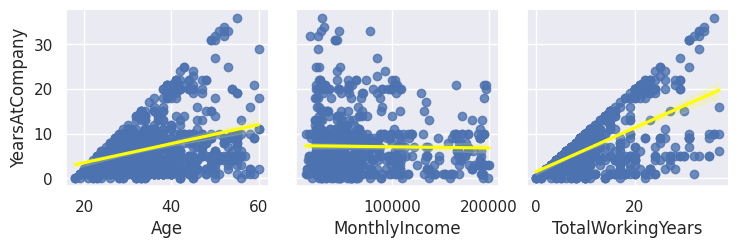

In [ ]:
tabela = tabela.dropna()
selected_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears']
X = tabela[selected_features]
y = tabela['YearsAtCompany']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

df_plot = X_test.copy()
df_plot['YearsAtCompany'] = y_test
sb.pairplot(df_plot, x_vars=['Age', 'MonthlyIncome', 'TotalWorkingYears'], y_vars='YearsAtCompany', kind='reg', plot_kws={'line_kws':{'color':'yellow'}})
plt.show()


Gledajući naš raspon ciljne varijable, koja je u ovom slučaju broj godina provedenih u kompaniji, a pri tom imajući u vidu da je taj raspon razlika najveće i najmanje vrijednosti, odnosno 36-1=35, vrijednost MSE je relativno mala u odnosu na raspon ciljne varijable, što ukazuje na relativno dobre performanse modela.

Na temelju rezultata modela s niskim Mean Squared Error (MSE), možemo zaključiti da postoji određena veza između ulaznih parametara (starost, mjesečna primanja i godine rada) i ciljne varijable (godine provedene u kompaniji).

Međutim, važno je napomenuti da ovaj zaključak proizilazi iz statističke analize podataka i modeliranja. To ne znači nužno da postoji uzročna veza između tih varijabli. Postoji mogućnost da postoji korelacija ili zajednički uticaj drugih faktora na obe strane veze (ulazne parametre i godine provedene u kompaniji). Također, postoji mogućnost da drugi faktori koji nisu uključeni u model također imaju uticaj na ciljnu varijablu.

Ovi rezultati sugerišu da ulazni parametri koje smo odabrali (starost, mjesečna primanja, godine rada) mogu biti dobri prediktori godina provedenih u kompaniji, ali ne daju apsolutnu potvrdu o uzročnoj vezi. Ako želimo dublje razumijevanje veza između tih varijabli, može biti korisno provesti daljnju analizu, uključujući i razmatranje drugih faktora koji mogu uticati na godine provedene u kompaniji.

Za sada nam je važno da smo otkrili koji su to primarni faktori koji utiču na godine provedene u kompaniji, te da potvrdimo naše teze s početka, a to je da ukoliko radnik ima očekivana mjesečna primanja u skladu sa svojim godinama i iskustvom, zaista će se duže zadržati u kompaniji.